<img src="https://www.univ-lyon1.fr/images/www/logo-lyon1.png">


# TP 6.2 - Analyse


#### Binôme : Ouhmaid khalid & ASRI Mohamed Amin

#### Encadré par : Aurelien Tabard

## Loading libraries and other dependencies

In [6]:
install.packages("afex") # For anovas
#install.packages("hrbrthemes")
install.packages("viridis") # For color-scales


  There is a binary version available but the source version is later:
     binary source needs_compilation
afex 0.28-1  1.0-1             FALSE



installing the source package 'afex'




  There is a binary version available but the source version is later:
        binary source needs_compilation
viridis  0.6.1  0.6.2             FALSE



installing the source package 'viridis'



In [7]:
# Data and stats libraries
library(tidyverse) # metapackage of all tidyverse packages
library(afex)       # for aov_ez()
library(parallel)   # for parLapply()

# Visualization libraries
library(ggplot2)
library(dplyr)
library(viridis)

# library(hrbrthemes)
# hrbrthemes::import_roboto_condensed() # to install Roboto, not necessary since web-based, just to remove error message.

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5       v purrr   0.3.4  
v tibble  3.1.2       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.4.0       v forcats 0.5.1  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lme4
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand

Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4
************
Welcome to afex. For support visit: http://afex.singmann.science/
- Functions for ANOVAs: aov_

## Chargement des données

In [51]:
data = read.csv('Ouhmaid-asri.csv', sep=',')
head(data)

ParticipantID TrialID Block1 Block2 Condition1     Condition2     wpm erreurs
1 1             1       1      1      Gesture_Gboard Deux_mains     15  1      
2 1             2       1      1      Gesture_Gboard Deux_mains     27  2      
3 1             3       1      1      Gesture_Gboard Deux_mains     26  0      
4 1             4       1      2      Gesture_Gboard Main_dominante 19  4      
5 1             5       1      2      Gesture_Gboard Main_dominante 28  2      
6 1             6       1      2      Gesture_Gboard Main_dominante 29  0      
  Correct.words Keystrokes TÃ.lÃ.phone
1  8            32         Samsung A7 
2 14            70         Samsung A7 
3 12            63         Samsung A7 
4 10            41         Samsung A7 
5 16            78         Samsung A7 
6 18            74         Samsung A7

## Visualisation des données

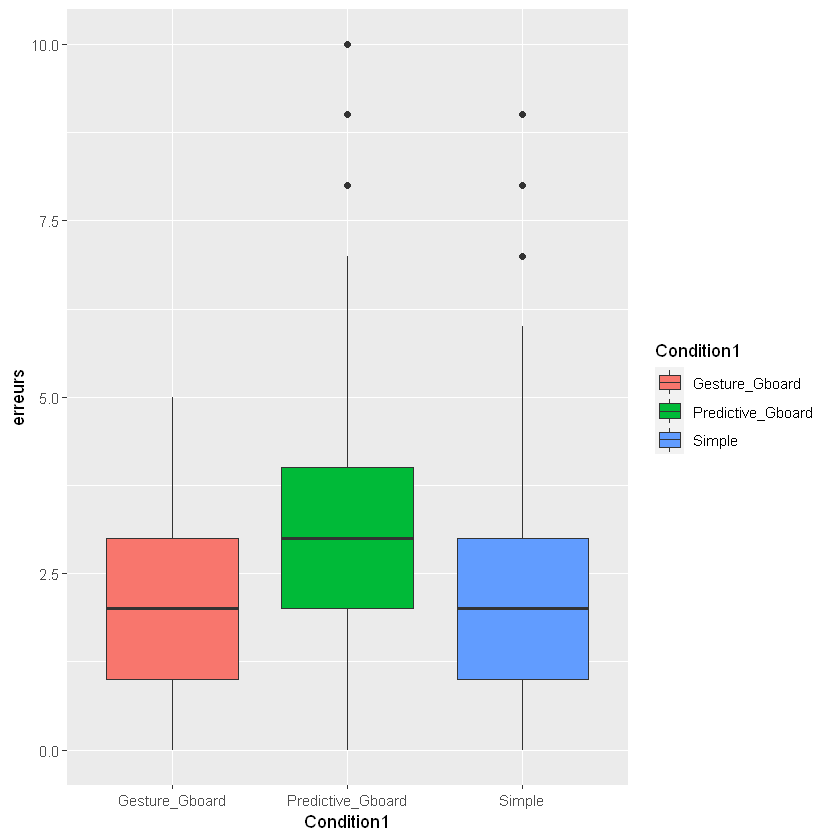

In [52]:
ggplot(data, aes(x=Condition1, y=erreurs, fill=Condition1)) +
  geom_boxplot() 

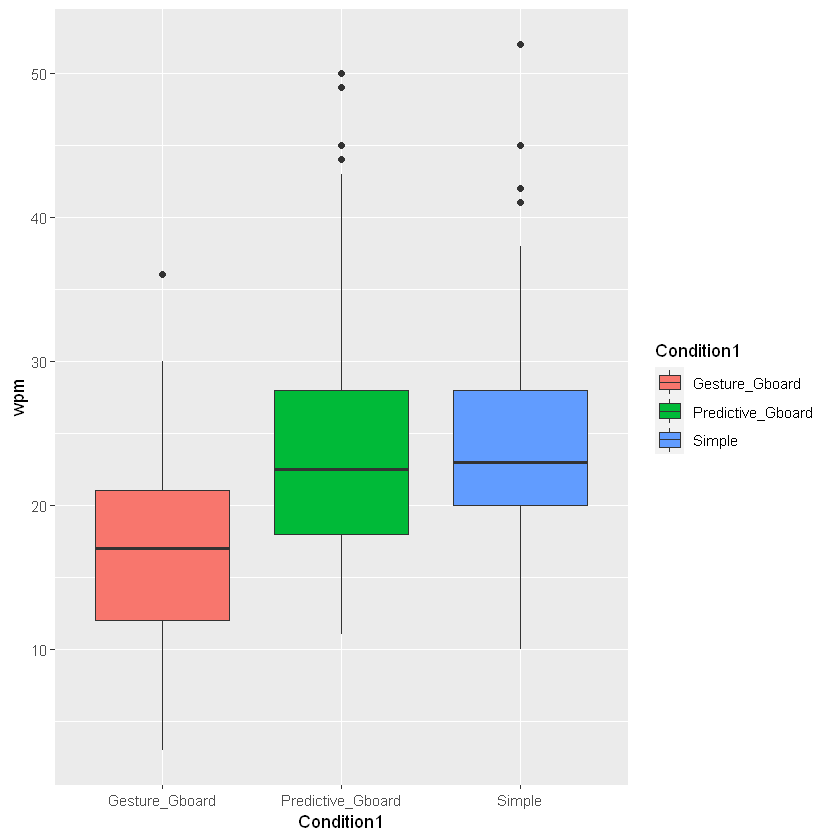

In [53]:
ggplot(data, aes(x=Condition1, y=wpm, fill=Condition1)) +
  geom_boxplot() 

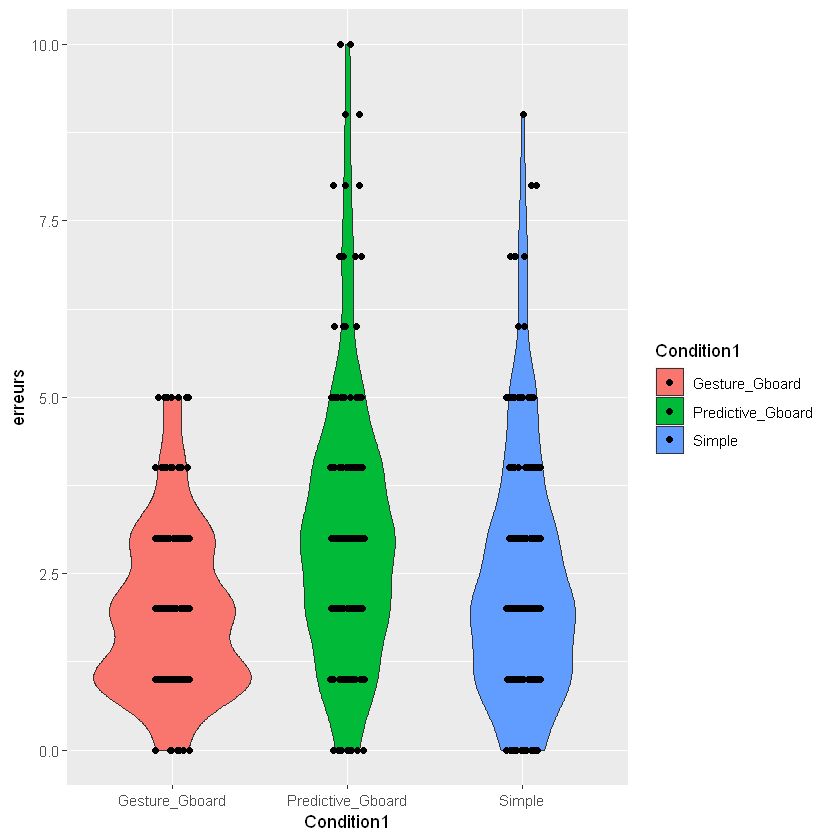

In [54]:
ggplot(data, aes(x=Condition1, y=erreurs, fill=Condition1)) + 
  geom_violin() + geom_jitter(height = 0, width = 0.1)

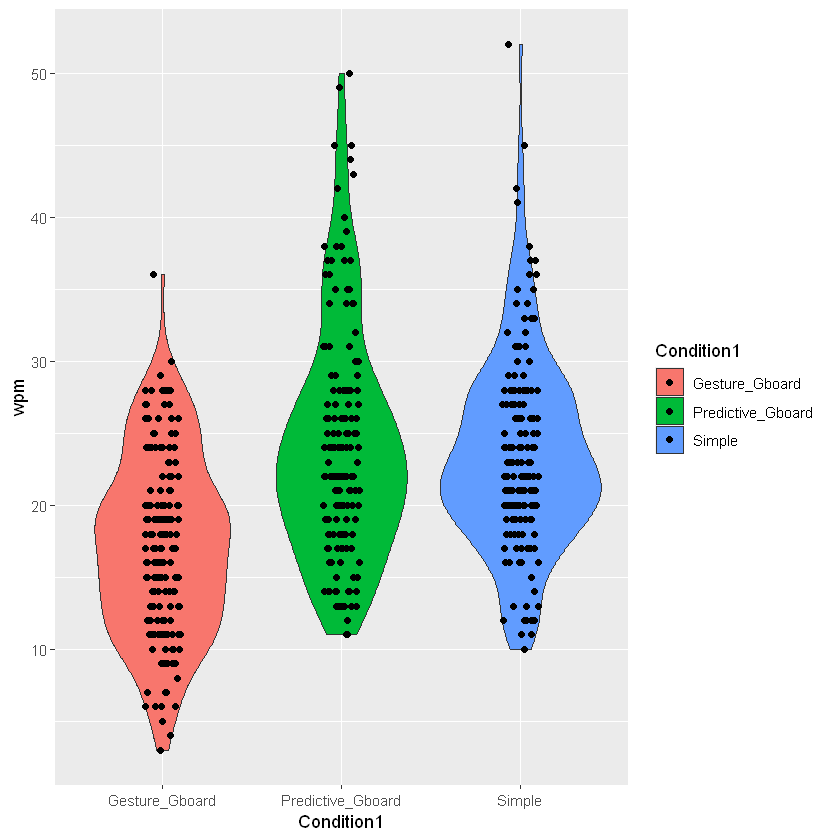

In [55]:
ggplot(data, aes(x=Condition1, y=wpm, fill=Condition1)) + 
  geom_violin() + geom_jitter(height = 0, width = 0.1)

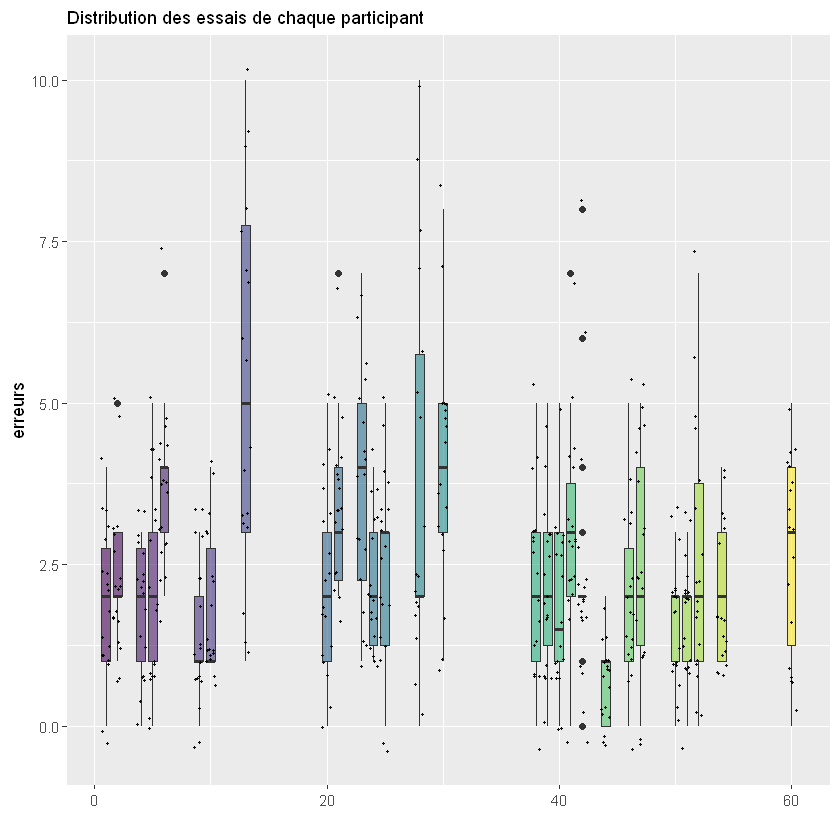

In [56]:
data %>%
  ggplot( aes(x=ParticipantID, y=erreurs, fill=ParticipantID, group=ParticipantID)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = FALSE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    #theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Distribution des essais de chaque participant") +
    xlab("")

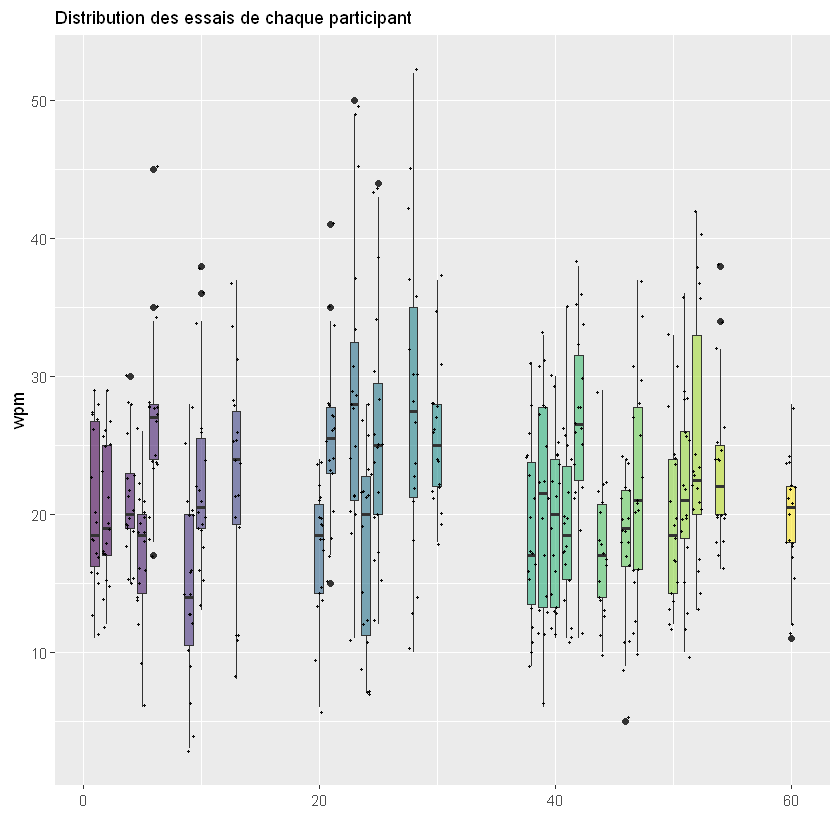

In [58]:
data %>%
  ggplot( aes(x=ParticipantID, y=wpm, fill=ParticipantID, group=ParticipantID)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = FALSE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    #theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Distribution des essais de chaque participant") +
    xlab("")

## Normalité des données

### Analyse visuelle de la distribution des données

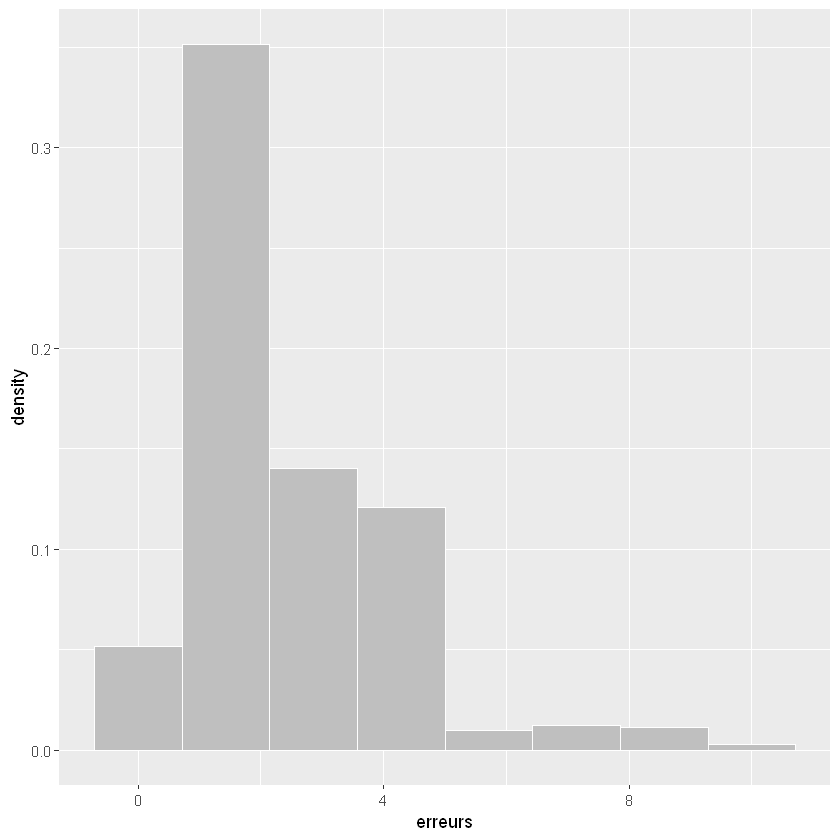

In [60]:
ggplot(data, aes(x = erreurs)) + 
    geom_histogram(aes(y =..density..), 
                   bins=8, # or specify manually : breaks = seq(0, 60, by = 10), 
                   colour = "white", fill="grey75")

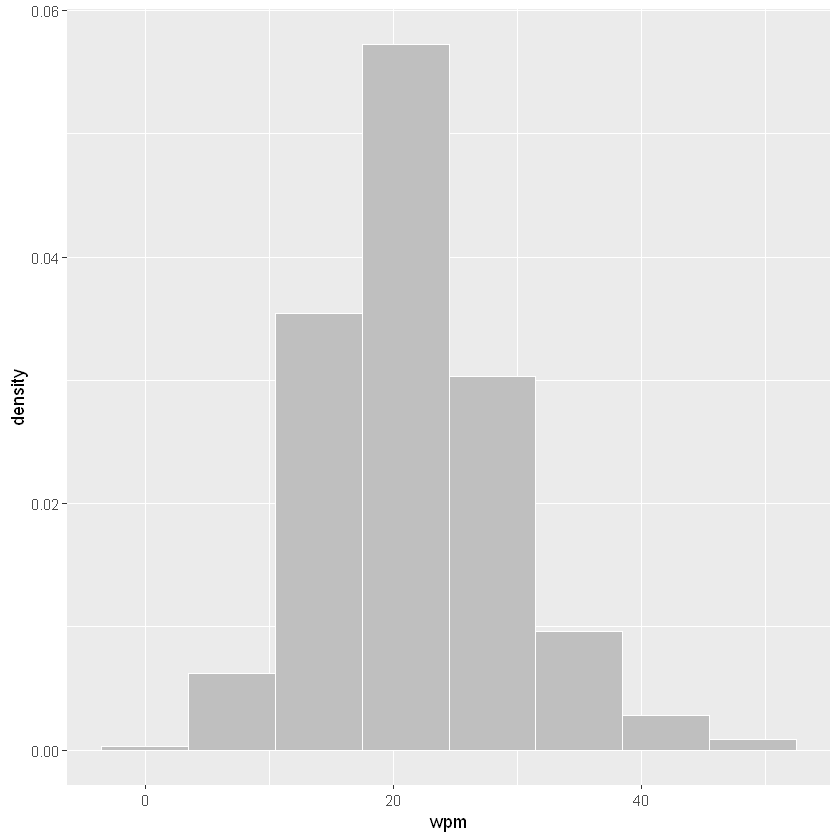

In [61]:
ggplot(data, aes(x = wpm)) + 
    geom_histogram(aes(y =..density..), 
                   bins=8, # or specify manually : breaks = seq(0, 60, by = 10), 
                   colour = "white", fill="grey75")

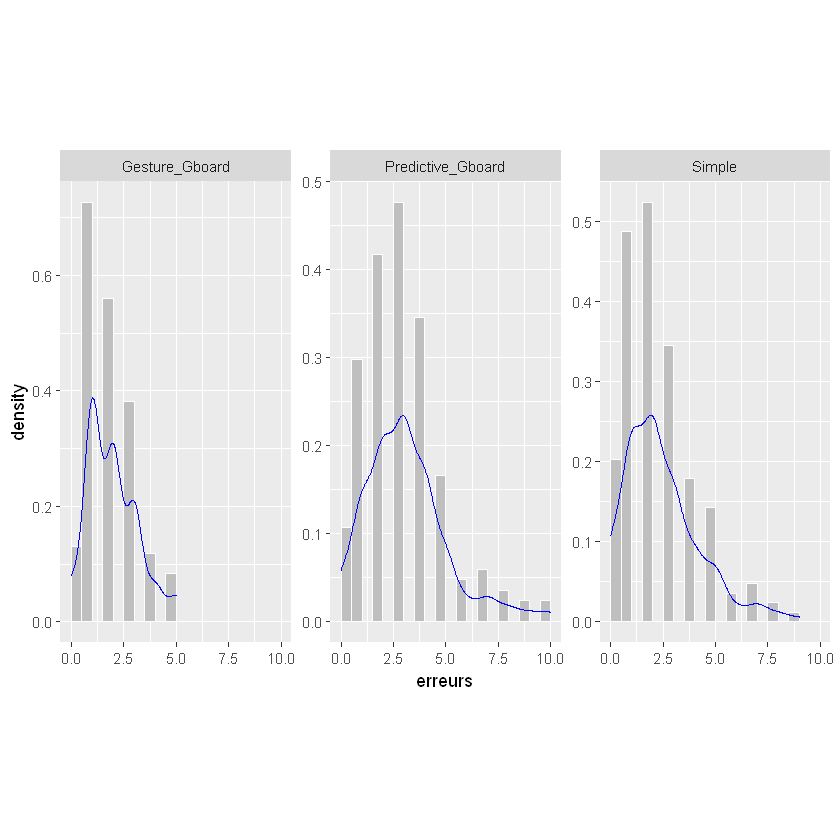

In [62]:
ggplot(data, aes(x=erreurs)) + 
  geom_histogram(aes(y=..density..), breaks = seq(0, 10, by = 0.5), colour = "white", fill="grey75") + 
  facet_wrap(~Condition1, scales = "free") +
  geom_density(aes(y=..density..), colour="blue")  +
  theme(aspect.ratio=2)

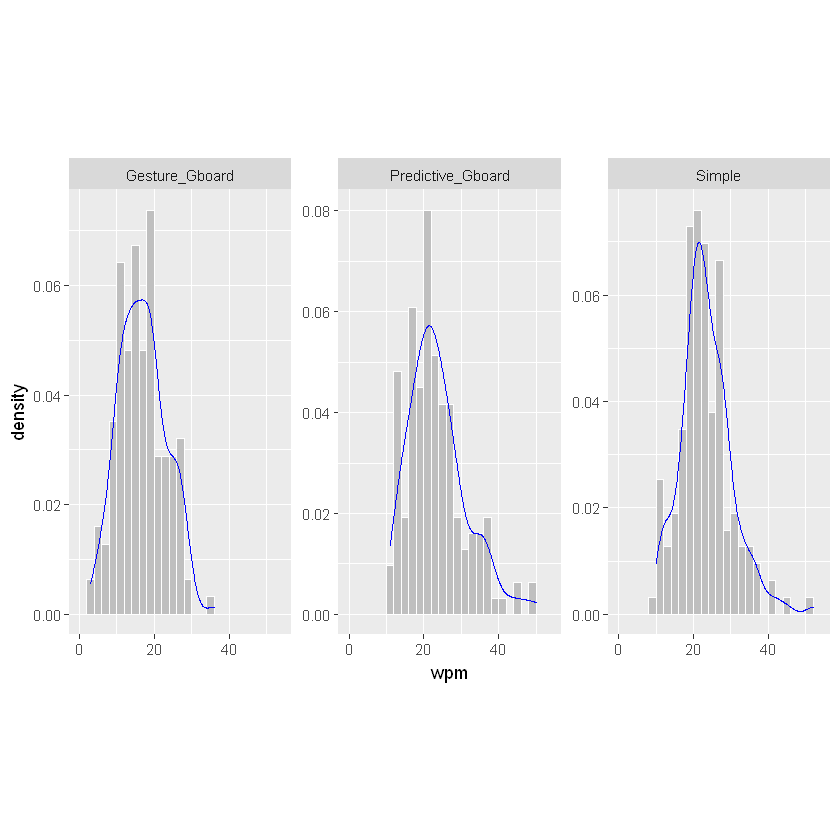

In [37]:
ggplot(data, aes(x=wpm)) + 
  geom_histogram(aes(y=..density..), breaks = seq(0, 55, by = 2), colour = "white", fill="grey75") + 
  facet_wrap(~Condition1, scales = "free") +
  geom_density(aes(y=..density..), colour="blue")  +
  theme(aspect.ratio=2)

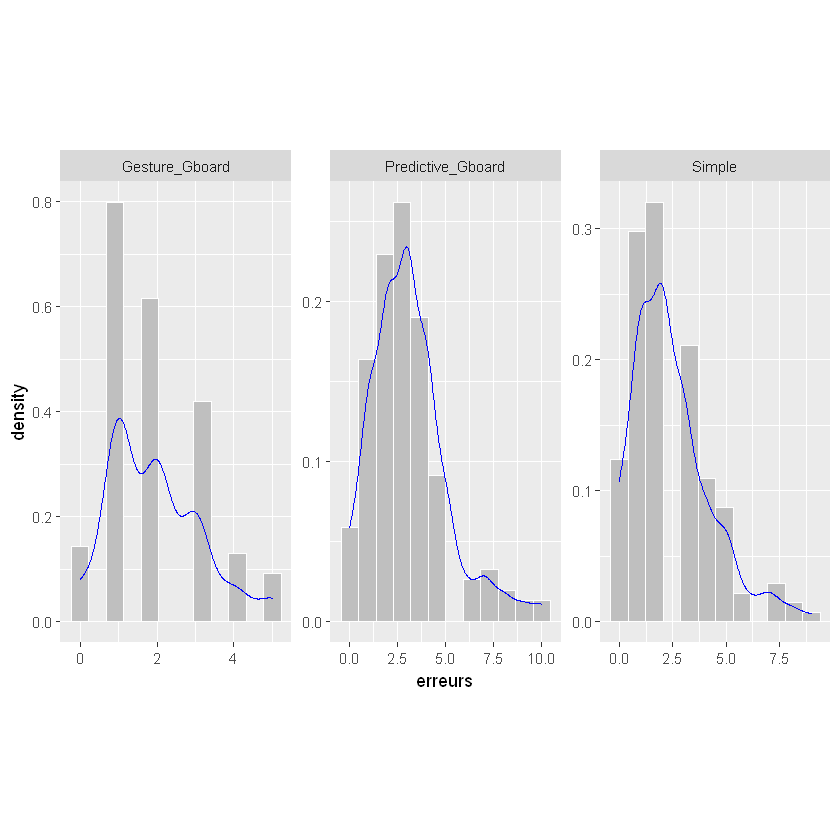

In [63]:
ggplot(data, aes(x=erreurs)) + 
  geom_histogram(aes(y=..density..), bins=12, colour = "white", fill="grey75") + 
  facet_wrap(~Condition1, scales = "free") +
  geom_density(aes(y=..density..), colour="blue") +
  theme(aspect.ratio=2)

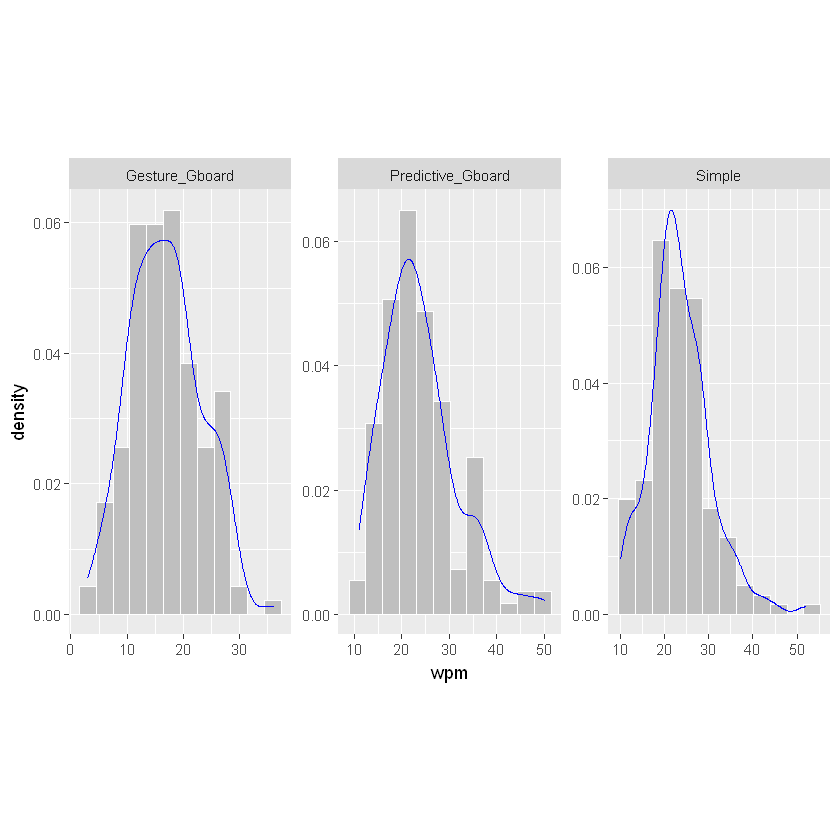

In [39]:
ggplot(data, aes(x=wpm)) + 
  geom_histogram(aes(y=..density..), bins=12, colour = "white", fill="grey75") + 
  facet_wrap(~Condition1, scales = "free") +
  geom_density(aes(y=..density..), colour="blue") +
  theme(aspect.ratio=2)

### qqplot

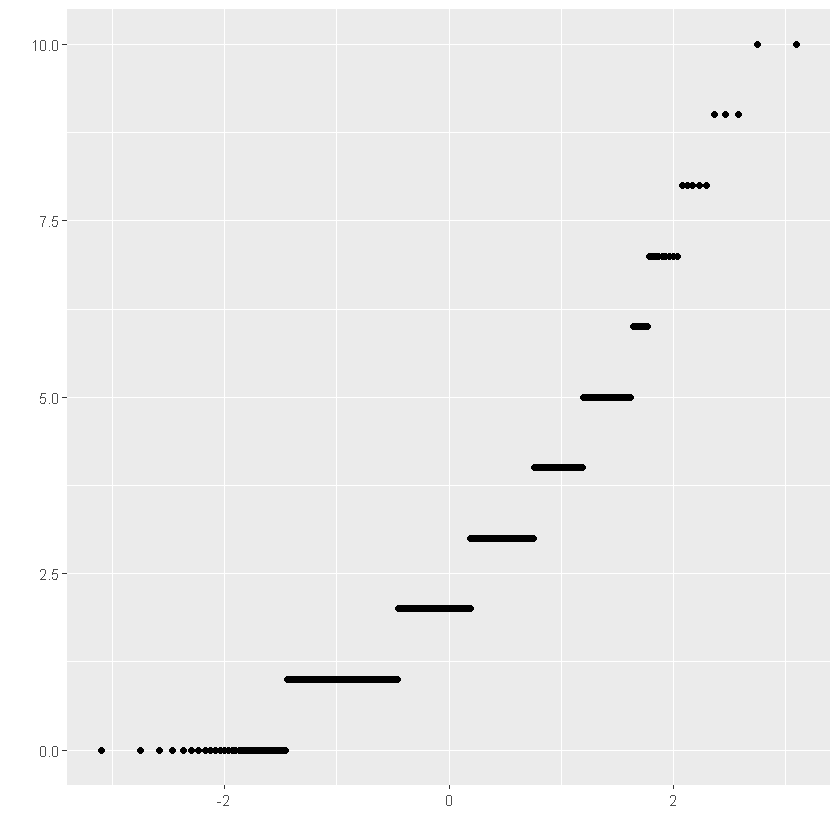

In [64]:
qplot(sample = erreurs, data = data, geom = "qq")

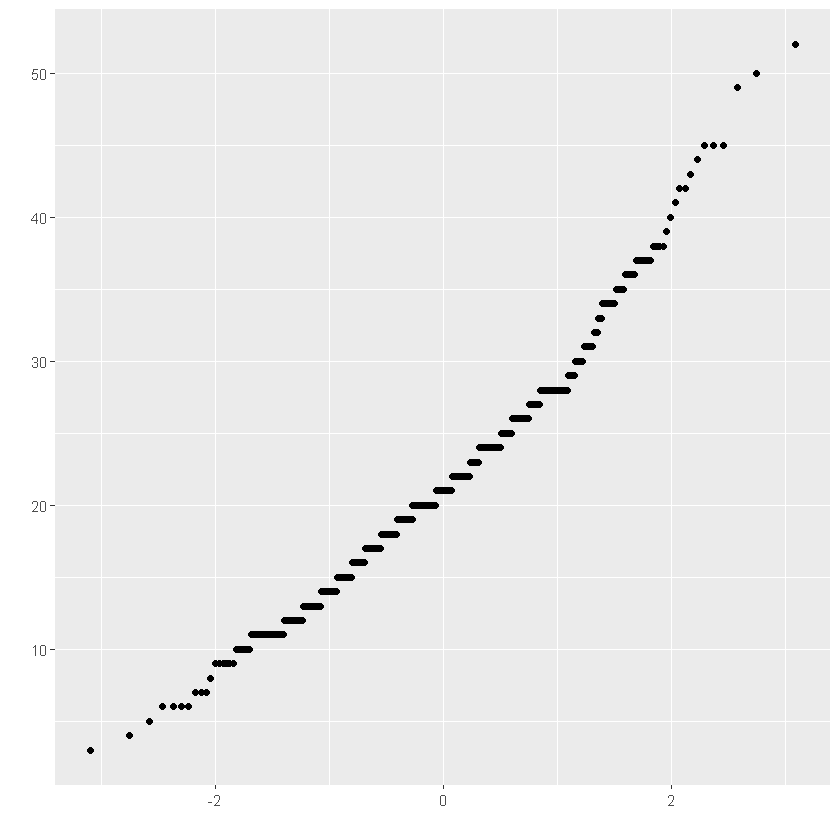

In [65]:
qplot(sample = wpm, data = data, geom = "qq")

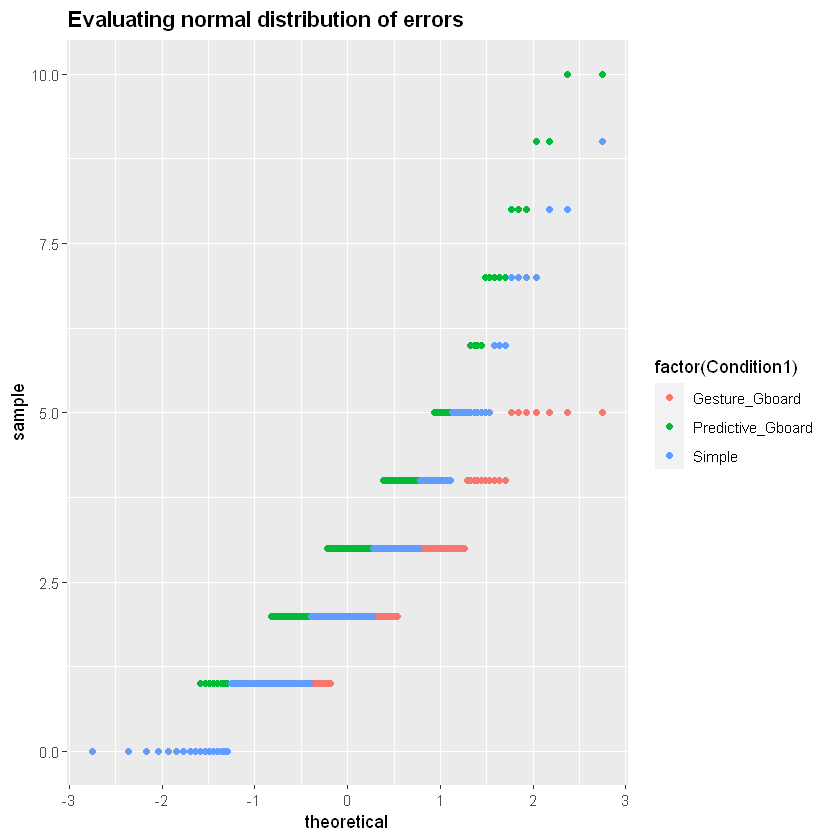

In [66]:
ggplot(data) +
        ggtitle("Evaluating normal distribution of errors") +
        theme(plot.title = element_text(lineheight = .8, face = "bold")) +
        stat_qq(aes(sample = erreurs, color = factor(Condition1)))

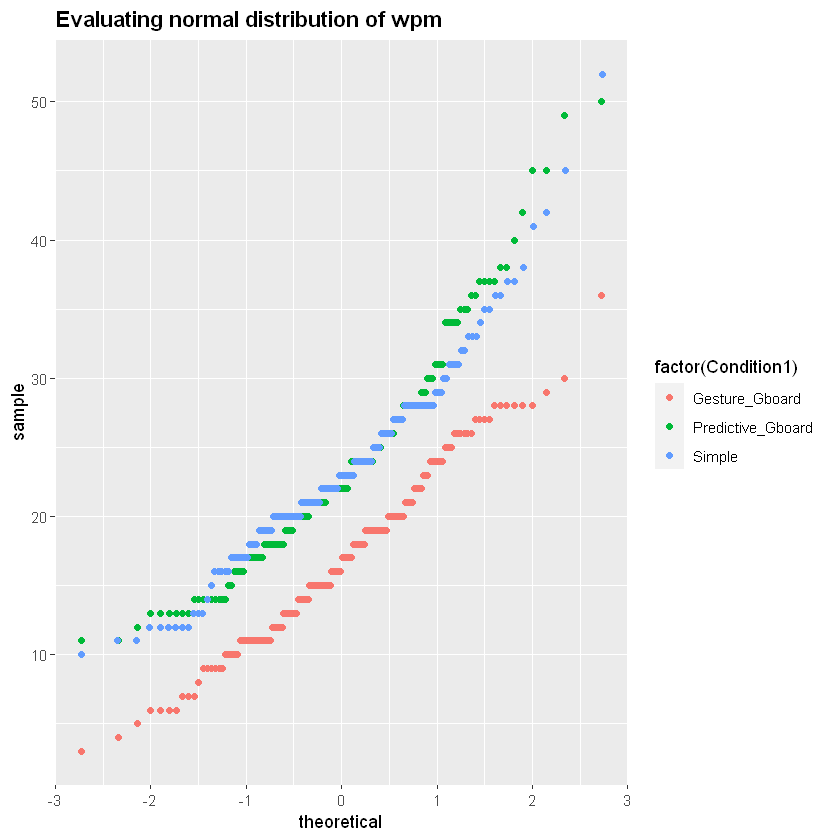

In [45]:
ggplot(data) +
        ggtitle("Evaluating normal distribution of wpm") +
        theme(plot.title = element_text(lineheight = .8, face = "bold")) +
        stat_qq(aes(sample = wpm, color = factor(Condition1)))

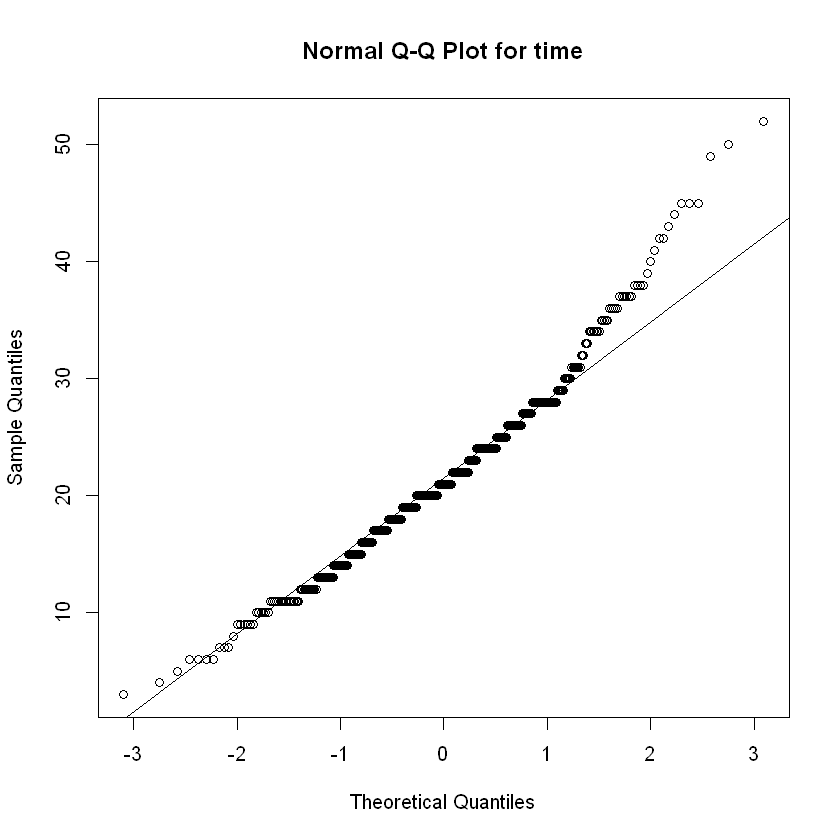

In [68]:
qqnorm(data$wpm, main = "Normal Q-Q Plot for time")
qqline(data$wpm)

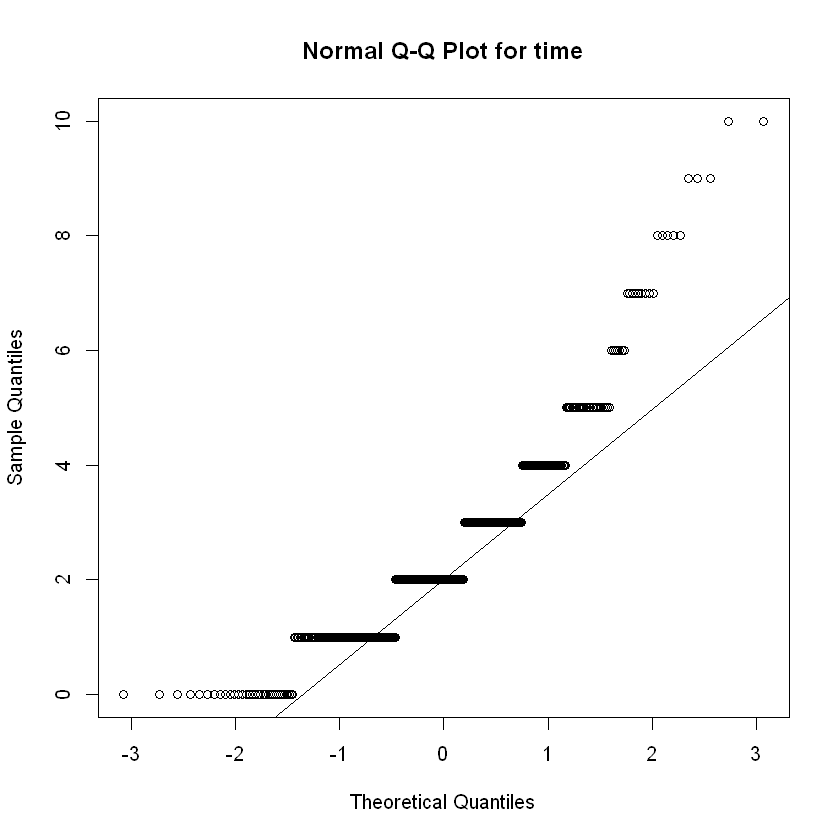

In [47]:
qqnorm(data$erreurs, main = "Normal Q-Q Plot for time")
qqline(data$erreurs)

In [87]:
shapiro.test(data$wpm)


	Shapiro-Wilk normality test

data:  data$wpm
W = 0.97315, p-value = 5.495e-08


In [88]:
shapiro.test(data$erreurs)


	Shapiro-Wilk normality test

data:  data$erreurs
W = 0.89167, p-value < 2.2e-16


## Analyse Gesture Board et Predictive Board pour le WPM

### Paired t-test

In [83]:
t.test(data[data["Condition1"]=="Gesture_Gboard",7], data[data["Condition1"]=="Predictive_Gboard",7], paired = TRUE)


	Paired t-test

data:  data[data["Condition1"] == "Gesture_Gboard", 7] and data[data["Condition1"] == "Predictive_Gboard", 7]
t = -9.4834, df = 167, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.471653 -5.552157
sample estimates:
mean of the differences 
              -7.011905 


### Test de signifiance avec Anova

In [90]:
data$method = factor(data$Condition1)
data$subject = factor(data$ParticipantID)

In [91]:
results = afex::aov_ez(
  data = data, 
  id = 'ParticipantID', # subject id column
  dv = 'wpm', # dependent variable
  within = c('Condition1'), # within-subject independent variables
  between = NULL ,# between-subject independent variables
  fun_aggregate = mean, # average multiple repetitions together for each subject*condition
  anova_table = list(es = 'ges') # effect size = generalized eta squared
)
results

Anova Table (Type 3 tests)

Response: wpm
      Effect          df   MSE         F  ges p.value
1 Condition1 1.61, 43.50 17.92 28.94 *** .302   <.001
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '+' 0.1 ' ' 1

Sphericity correction method: GG 